# Doroob E-Learning Dataset

# منصة دروب هي منصة وطنية للتدريب الإلكتروني وهي إحدى مبادرات صندوق تنمية الموارد البشرية التي تسعى إلى تمكين القوى العاملة من خلال تطوير قدراتهم ورفع مهاراتهم وفق احتياجات سوق العمل وسبب الدراسة الاحصائية  لمعرفة اهمية منصة دروب وبيان مدى اهتمام المتدربين لحضور الدورات المقدمه من منصة دروب من كافة أنحاء اللمملكة

## Website :https://www.doroob.sa/
### Dataset Source: https://od.data.gov.sa/ar/national-platforms

In [415]:
# First install required liberary to print arabic letters clearly
import sys
!{sys.executable} -m pip install arabic_reshaper
!{sys.executable} -m pip install python-bidi

ERROR: Could not find a version that satisfies the requirement bidi.algorithm (from versions: none)
ERROR: No matching distribution found for bidi.algorithm


In [422]:
## Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
df = pd.read_excel('doroob_2022.xlsx', sheet_name=None)

In [3]:
stdf = pd.DataFrame(list(df.values())[0])


In [472]:
columns = [ c for c in stdf.columns]
colomns

['ID',
 'العمر',
 'اسم التدريب',
 'تاريخ التسجيل',
 'تاريخ الانتهاء',
 'المدينة',
 'المنطقة',
 'الجنس']

In [5]:
# this is the main dataframe that we will work with
stdf.head()

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى


In [6]:
# this is just a test for grouping 'اسم التدريب'
group = stdf[['ID' , 'اسم التدريب']].groupby('اسم التدريب').count()
group.sort_values(by='ID', ascending=False, inplace=True)
group.head()

,ID
اسم التدريب,
العقلية الريادية وإدارة الأزمات,4670
العناصر الرئيسية لنجاح ريادة الأعمال,4026
استمرارية الأعمال والتعافي من الأزمات,3595
إدارة المشتريات وأصحاب مصلحة المشروع,3583
مكونات الإبداع في بيئة العمل,3548


## First Apply EDA

### EDA steps: head, shape, info, describe, missing values

In [317]:
stdf

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى
...,...,...,...,...,...,...,...,...
150807,150808,52.0,التسويق بالبريد الإلكتروني,2022-12-07 13:23:20,2022-12-14 07:26:18,الزلفي,الرياض,انثى
150808,150809,49.0,البيع الاحترافي,2022-12-13 15:26:28,2022-12-13 15:30:13,NaN,NaN,انثى
150809,150810,41.0,كيف تكتشف ميولك المهني؟,2022-12-07 11:46:48,2022-12-07 13:22:53,NaN,NaN,انثى
150810,150811,38.0,إدارة الضغوط في العمل,2022-12-07 05:14:22,2022-12-07 05:32:20,NaN,NaN,ذكر


In [318]:
stdf.head()

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى


In [319]:
stdf.shape

(150812, 8)

In [320]:
stdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150812 entries, 0 to 150811
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              150812 non-null  int64         
 1   العمر           150741 non-null  float64       
 2   اسم التدريب     150812 non-null  object        
 3   تاريخ التسجيل   150812 non-null  datetime64[ns]
 4   تاريخ الانتهاء  109262 non-null  datetime64[ns]
 5   المدينة         130455 non-null  object        
 6   المنطقة         95106 non-null   object        
 7   الجنس           150579 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 9.2+ MB


In [7]:
stdf.describe(include='all')

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
count,150812.000000,150741.000000,150812,150812,109262,130455,95106,150579
unique,NaN,NaN,357,121634,93082,138,13,2
top,NaN,NaN,العقلية الريادية وإدارة الأزمات,2022-12-17 11:02:25,2022-12-17 10:15:32,الرياض,الرياض,انثى
freq,NaN,NaN,4670,7,6,22795,29195,110277
first,NaN,NaN,NaN,2022-12-06 21:32:49,2022-12-06 21:34:09,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-12-18 21:33:40,2022-12-18 21:33:41,NaN,NaN,NaN
mean,75406.500000,41.618710,NaN,NaN,NaN,NaN,NaN,NaN
std,43535.818736,12.548342,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-46.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,37703.750000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
print('The missung values in each column')
print(stdf.isna().sum())
print('Total missing values: ',sum(stdf.isna().sum()))

The missung values in each column
ID                    0
العمر                 0
اسم التدريب           0
تاريخ التسجيل         0
تاريخ الانتهاء    26654
المدينة               0
المنطقة               0
الجنس                 0
dtype: int64
Total missing values:  26654


In [ ]:
stdf.dropna(subset=[])

### Apply the additional EDA steps based on your dataset needs.

In [42]:
#remove all recoreds with null value on stdf except 'تاريخ الانتهاء' 
#because we want to find if the student finish the course or not.

del columns[4] # remove 'تاريخ الانتهاء' from colomns
stdf.dropna(subset=columns,inplace=True)
stdf

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
5,6,45.0,خدمة العملاء - تَعامل بإحترافية,2022-12-15 21:28:27,NaT,جدة,مكة المكرمة,انثى
...,...,...,...,...,...,...,...,...
150791,150792,42.0,مفاتيح التفاوض الفعال,2022-12-07 20:38:12,NaT,تبوك,تبوك,انثى
150797,150798,24.0,إدارة المنتجات,2022-12-12 11:19:04,2022-12-12 12:42:06,تبوك,تبوك,ذكر
150799,150800,45.0,مكونات الإبداع في بيئة العمل,2022-12-07 16:39:18,2022-12-07 16:46:28,تبوك,تبوك,انثى
150802,150803,22.0,برنامج جداول البيانات Excel,2022-12-13 21:39:51,2022-12-13 22:09:45,الدوادمي,الرياض,ذكر


In [68]:
# Add one column of Duratin it take to finish the course
Duration = stdf.iloc[:,4]-stdf.iloc[:,3]
stdf['Duration'] = Duration


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
150791,150792,42.0,مفاتيح التفاوض الفعال,2022-12-07 20:38:12,NaT,تبوك,تبوك,انثى,NaT
150797,150798,24.0,إدارة المنتجات,2022-12-12 11:19:04,2022-12-12 12:42:06,تبوك,تبوك,ذكر,0 days 01:23:02
150799,150800,45.0,مكونات الإبداع في بيئة العمل,2022-12-07 16:39:18,2022-12-07 16:46:28,تبوك,تبوك,انثى,0 days 00:07:10
150802,150803,22.0,برنامج جداول البيانات Excel,2022-12-13 21:39:51,2022-12-13 22:09:45,الدوادمي,الرياض,ذكر,0 days 00:29:54
150807,150808,52.0,التسويق بالبريد الإلكتروني,2022-12-07 13:23:20,2022-12-14 07:26:18,الزلفي,الرياض,انثى,6 days 18:02:58


In [69]:
#to get a picture for cleaning by age
stdf.groupby(by='العمر').max()

,ID,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
العمر,,,,,,,,
-46.0,145664,مهارات القيادة,2022-12-18 04:07:43,2022-12-18 04:08:49,جدة,مكة المكرمة,ذكر,1 days 04:50:21
-45.0,116697,كيف تجعل صاحب العمل يرى إمكانياتك,2022-12-17 23:49:50,2022-12-17 23:53:56,الاحساء,المنطقة الشرقية,ذكر,0 days 00:04:06
-44.0,89945,مهارات التفكير الإبداعي,2022-12-18 20:34:40,2022-12-15 21:05:34,المدينة المنورة,المدينة المنورة,ذكر,0 days 00:23:02
-42.0,79264,مهارات التفكير الإبداعي,2022-12-12 20:00:02,2022-12-12 21:43:43,خميس مشيط,عسير,ذكر,0 days 01:43:41
-41.0,128774,شخصيتك علامة تجارية,2022-12-17 18:50:59,2022-12-18 13:13:15,القصيم,القصيم,انثى,0 days 20:32:57
-40.0,140672,مكونات الإبداع في بيئة العمل,2022-12-18 11:43:36,2022-12-18 11:49:50,الجوف,الجوف,انثى,0 days 01:34:17
6.0,136692,المهارات الرقمية في بيئة العمل,2022-12-18 12:50:22,2022-12-07 17:04:50,الرياض,الرياض,انثى,0 days 09:18:08
14.0,113953,مهارات المحادثة باللغة الإنجليزية للمبتدئين,2022-12-18 18:36:59,2022-12-17 13:17:11,جدة,مكة المكرمة,ذكر,0 days 00:04:26
15.0,146558,وسائل وتقنيات التسويق الإلكتروني,2022-12-18 21:07:59,2022-12-18 19:49:05,ينبع البحر,مكة المكرمة,ذكر,5 days 16:41:13


In [70]:
# there is a huge increase in age after 71 so I kept the numbers between 75-15
stdf=stdf[stdf['العمر']< 75]
stdf=stdf[stdf['العمر']> 15]

In [71]:
# this is a prefernce for keeping the data organize
stdf.sort_values(by='العمر', ignore_index=True, inplace=True)
stdf

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
0,60932,16.0,إدارة أداء المبيعات,2022-12-16 07:51:51,NaT,الرياض,الرياض,ذكر,NaT
1,13926,16.0,الثقافة العمالية وفق نظام العمل السعودي,2022-12-15 00:11:39,NaT,جدة,مكة المكرمة,ذكر,NaT
2,2315,16.0,أساسيات ومبادئ المحاسبة المالية - الجزء الثاني,2022-12-14 22:59:57,2022-12-14 23:06:00,جدة,مكة المكرمة,ذكر,00:06:03
3,82967,16.0,خطة التسويق لرواد الأعمال,2022-12-17 12:48:58,2022-12-17 12:50:43,الرياض,الرياض,ذكر,00:01:45
4,32258,16.0,التصوير الفوتوغرافي وتحريرالصور- تعرف على تقني...,2022-12-16 04:55:57,NaT,الرياض,الرياض,ذكر,NaT
...,...,...,...,...,...,...,...,...,...
94857,70915,68.0,تطوير علاقات البيع,2022-12-07 12:22:01,2022-12-07 12:42:30,الرياض,الرياض,ذكر,00:20:29
94858,142207,68.0,إدارة مبيعات التجزئة,2022-12-07 12:10:05,NaT,الرياض,الرياض,ذكر,NaT
94859,149370,68.0,إدارة البيع بالتجزئة,2022-12-07 12:07:35,NaT,الرياض,الرياض,ذكر,NaT
94860,141103,68.0,مهاراتُ إدارةِ المبيعات,2022-12-07 12:20:50,NaT,الرياض,الرياض,ذكر,NaT


In [327]:
stdf.describe()

,ID,العمر
count,68250.000000,68250.000000
mean,74479.211883,42.189802
std,43852.096035,6.930008
min,2.000000,16.000000
25%,36436.250000,39.000000
50%,73264.500000,43.000000
75%,112473.750000,46.000000
max,150808.000000,71.000000


# 1
###   - معرفة أكثر خمس دورات استخدامًا

In [328]:
# to be completed 

# 2
### -  المواضيع الاكثر اهتماماً لكل (ذكر\انثى)

In [329]:
# to be completed

## 3
### عدد المتدربين من كل منطقه..

In [531]:
# to be compeleted

group = stdf.groupby('المنطقة').count()
pd.DataFrame(group)

# Extract areas and put in a list
areas = group.head(20).index.tolist()
areas = [get_display(arabic_reshaper.reshape(x)) for x in areas]


In [532]:
# Extract counts of each area and put them on a list
values = [int(x) for x in group['ID']]


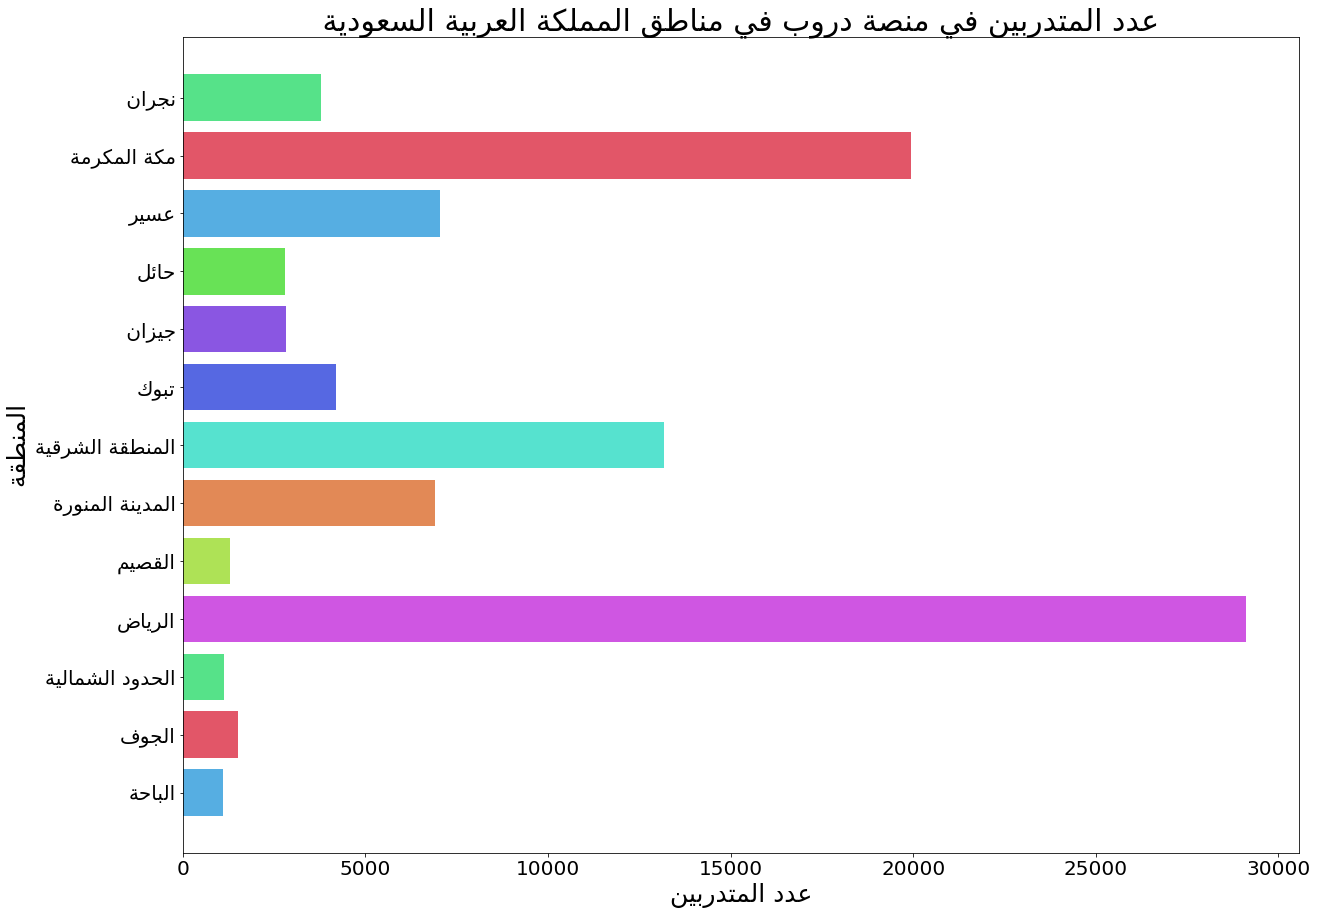

In [529]:
# Draw Horizantal Bar chart
plt.figure(figsize=(20,15))
colors=['#56aee2','#e25668','#56e289','#cf56e2','#aee256','#e28956','#56e2cf','#5668e2','#8a56e2','#68E256']
arabictitle =  get_display(arabic_reshaper.reshape(" عدد المتدربين في منصة دروب في مناطق المملكة العربية السعودية "))

arabicx=  get_display(arabic_reshaper.reshape(" عدد المتدربين "))
arabicy=  get_display(arabic_reshaper.reshape(" المنطقة "))
plt.title(arabictitle,fontsize=30)
plt.xlabel(arabicx,fontsize = 25)
plt.ylabel(arabicy,fontsize = 25)
plt.barh(areas,values , color = colors)


# change the size of x axes and y axes
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels



plt.show()

## 4
### -مواضيع الدورات الاكثر اهتمامًا على حسب المنطقة.

In [331]:
# to be compeleted

## 5
### معرفة مواضيع الدوارات التي تم إتمامها منها ومدة الإتمام

In [332]:
# to be compeleted

## 6
### -معرفة عدد المتدربين  كل فئة عمرية

In [333]:
# to be compeleted

## 7
### - بيان للفئات العمريه المهتمه بدورات تقنية المعلومات

In [277]:
# to be compeleted
# Group data to by 'اسم التدريب' and count them and sort them from hieast to lowest.
group = stdf.groupby('اسم التدريب').count()
group.sort_values(by='ID', ascending=False, inplace=True)
pd.DataFrame(group)

# Extract IT and Computer science courses and put it in a list
courseslist = group.head(20).index.tolist()
courseslist = [courseslist[2],courseslist[6],courseslist[7],courseslist[9],courseslist[11],courseslist[12]]
courseslist


['استمرارية الأعمال والتعافي من الأزمات',
 'برنامج جداول البيانات Excel',
 'برنامج معالجة النصوص Word',
 'برنامج العروض التقديمية PowerPoint',
 'تعرّف على أساسيات الحاسب الآلي',
 'الأمن السيبراني']

In [467]:
# Make sub dataframe (itfr) which is include only IT and computer courses
itfr = stdf[stdf['اسم التدريب'].isin(courseslist)]

#change 'العمر' from float type to int type
itfr = itfr.astype({'العمر':'int'})


# Add 'Age Catagory' to datset so we can calcolate 

ageg=['15 To 20 Yrs','20 To 25 Yrs' ,'25 To 30 Yrs', '30 To 35 Yrs','35 To 40 Yrs','40 to 45 Yrs','45 To 50 Yrs', 'Above 50 Yrs' ]
bins =[15,20,25,30,35,40,45,50 ,np.inf]
itfr['Age Catagory'] = pd.cut(itfr['العمر'],bins=bins,labels=ageg)
itfr.groupby('Age Catagory').count()


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
Age Catagory,,,,,,,,,
15 To 20 Yrs,371,371,371,371,179,371,371,371,179
20 To 25 Yrs,694,694,694,694,284,694,694,694,284
25 To 30 Yrs,485,485,485,485,255,485,485,485,255
30 To 35 Yrs,635,635,635,635,423,635,635,635,423
35 To 40 Yrs,1738,1738,1738,1738,1288,1738,1738,1738,1288
40 to 45 Yrs,3617,3617,3617,3617,2782,3617,3617,3617,2782
45 To 50 Yrs,1791,1791,1791,1791,1382,1791,1791,1791,1382
Above 50 Yrs,802,802,802,802,615,802,802,802,615


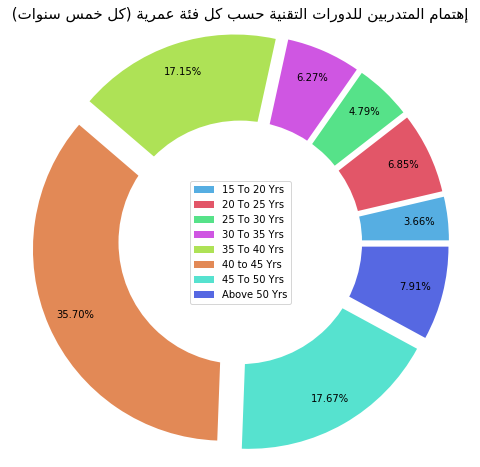

In [530]:
# Draw the digram
group = itfr[['ID','Age Catagory']].groupby('Age Catagory').count()
labels = list(group.index) # Labels
value = [int(x) for x in group.values] # X values
colors=['#56aee2','#e25668','#56e289','#cf56e2','#aee256','#e28956','#56e2cf','#5668e2','#8a56e2','#68E256']
plt.figure(figsize=(8,8)) # the size of figure
arabictitle =  get_display(arabic_reshaper.reshape(" إهتمام المتدربين للدورات التقنية حسب كل فئة عمرية (كل خمس سنوات) "))
plt.title( arabictitle ,fontsize=15)

plt.pie(value , colors = colors, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1 ,0.1] ,autopct='%1.2f%%',pctdistance=0.85, radius=1.1)
plt.legend(labels,loc=10)
#Draw white circle to to make it like donut shape.
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.show()

## 8
### -معرفة اكثر الدورات اهتماما للفئة العمرية من ١٥ الى ٢٠

In [335]:
## to be compeleted